In [1]:
#import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the CSV file into the pandas Dataframe
data=pd.read_csv("IRIS.csv")

In [3]:
#viewing the first few rows of the DataFrame
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#viewing the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#viewing the dataset description
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Checking if any null values exist in dataset or not
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values in the dataset

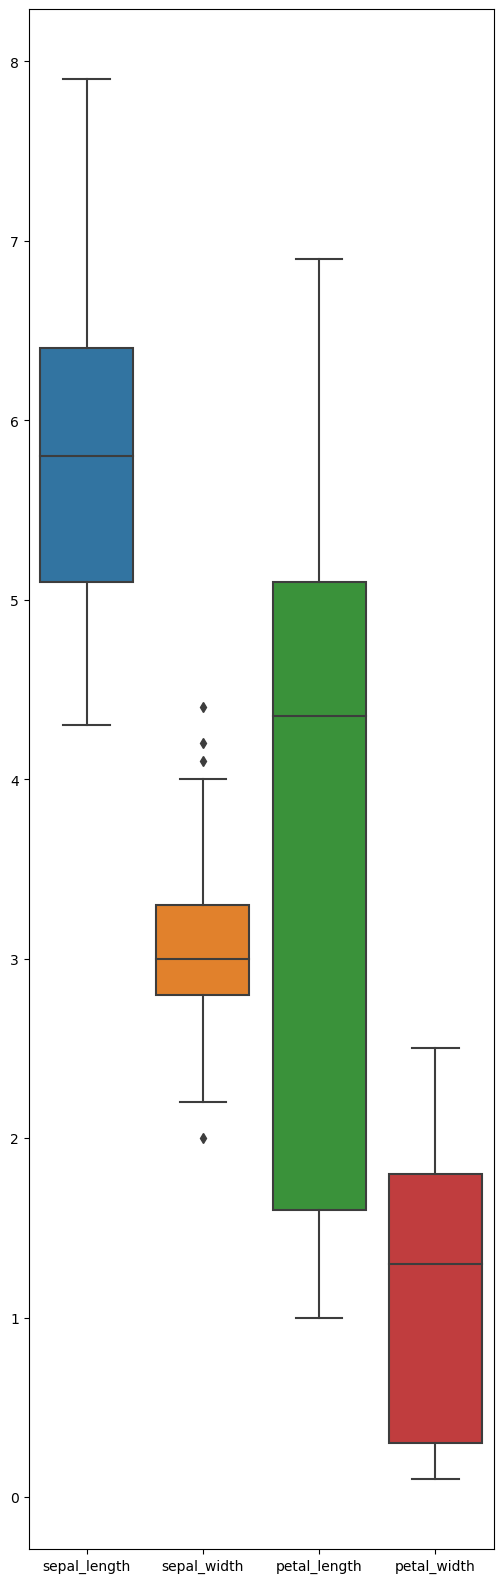

In [7]:
#plotting box plot for any outliers in the Data
fig, ax = plt.subplots(figsize = (6,20))
sns.boxplot(data = data, ax=ax)
plt.savefig('boxplot.png')

The box plot shows that there are less number of outliers in the data, so it not affect much the outcome of the data

In [8]:
#checking for Data imbalancing
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
## Now, this is case of Ordinal Categorical type,so we have perform LabelEncoder
data.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}, inplace = True)

In [10]:
#Check of the data after converting values of species from categorical to numerical 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


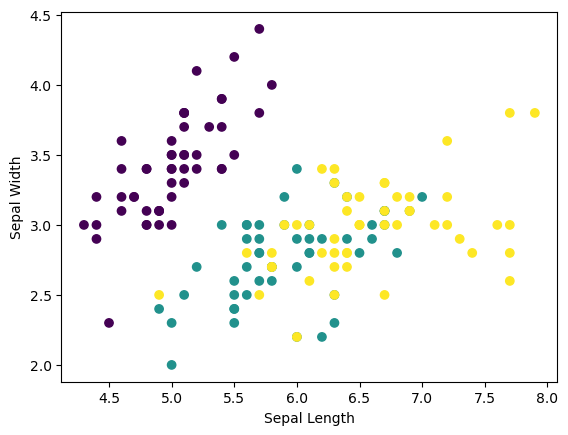

In [11]:
#Plotting Scatter plot for sepal_lenth  VS sepal_width
plt.scatter(x="sepal_length",y="sepal_width",data=data,c=data['species'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

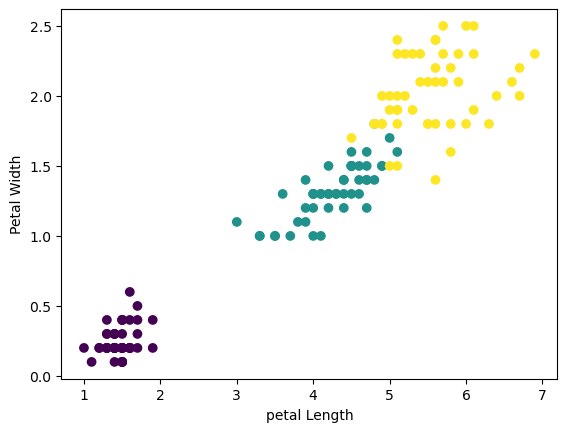

In [12]:
#Plotting Scatter plot for petal_lenth  VS petal_width
plt.scatter(x="petal_length",y="petal_width",data=data,c=data['species'])
plt.xlabel('petal Length')
plt.ylabel('Petal Width')
plt.show()

In [13]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 100.00%


So, accuracy of 100% is achieved using K Nearest Neighbours Model

In [22]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

We are not using Decision trees as they, are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.

In [23]:
data.replace({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"}, inplace = True)

In [24]:
new_sepal_length = 5.1
new_sepal_width = 3.5
new_petal_length = 1.4
new_petal_width = 0.2

In [25]:
new_data = [[new_sepal_length, new_sepal_width, new_petal_length, new_petal_width]]
prediction = knn.predict(new_data)

print('Predicted Species: {}'.format(data['species'][prediction[0]]))

Predicted Species: Iris-setosa


C:\Users\arshv\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


As we can see our model is predicting correct ouptput for set on new values